<IPython.core.display.Javascript object>


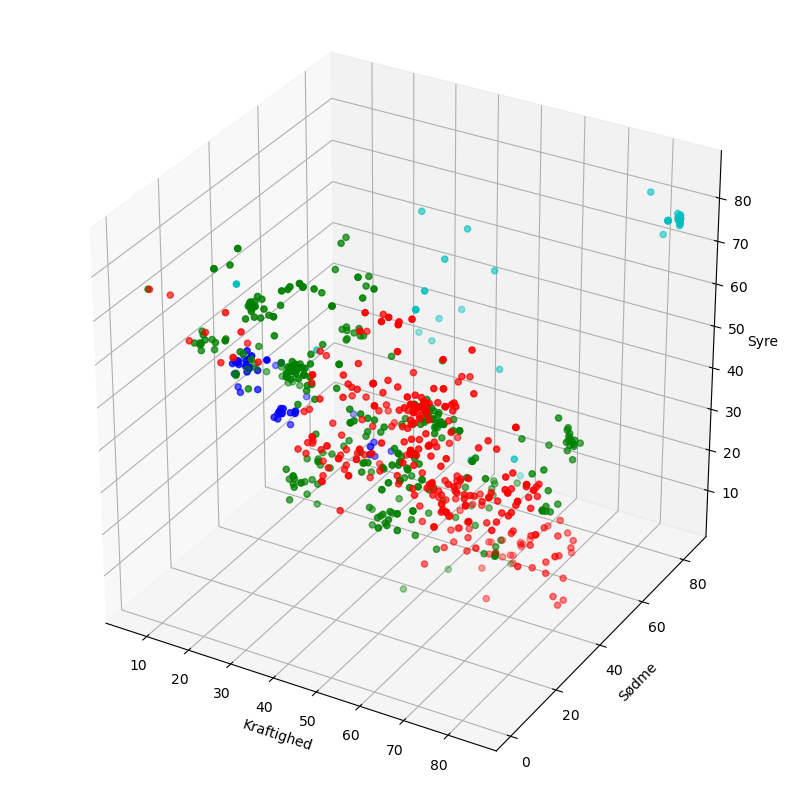

In [1]:
%matplotlib notebook

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.cm as cm
import itertools
import pandas as pd

df = pd.read_csv('RedWineWithNotes.csv')#[0:150]
dfRose = pd.read_csv('RoseWineWithNotes.csv')
dfDessert = pd.read_csv('DessertWineWithNotes.csv')
dfWhite = pd.read_csv('WhiteWineWithNotes.csv')#[0:150]

temp = df.append(dfRose, ignore_index=True)
tempappended_df = temp.append(dfDessert, ignore_index=True)
appended_df = tempappended_df.append(dfWhite, ignore_index=True)                      
filt = appended_df['Boldness'] > 0
appended_df = appended_df[filt]

fig = pyplot.figure(figsize=(8,8))
ax = Axes3D(fig)

colors = "rbcgm"
types = appended_df.Winetype.unique()

for wine_type, c in zip(types, colors):
    mask = appended_df['Winetype'] == wine_type
    sequence_x = appended_df[mask]['Boldness']
    sequence_y = appended_df[mask]['Sweetness']
    sequence_z = appended_df[mask]['Acidity']
    ax.scatter(sequence_x, sequence_y, sequence_z, color=c)
    
ax.set_xlabel('Kraftighed')
ax.set_ylabel('Sødme')
ax.set_zlabel('Syre')
pyplot.show()

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


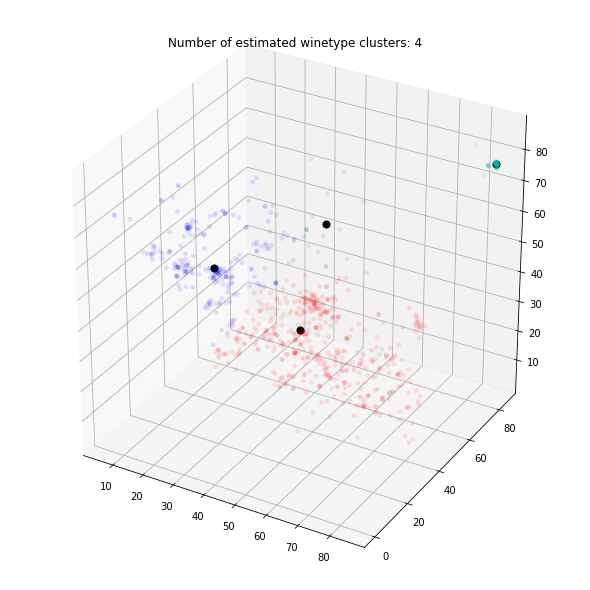

In [2]:
%pylab inline 
from sklearn.cluster import MeanShift, estimate_bandwidth
appended_clean = appended_df.drop(columns=['Name', 'Country', 'Winetype', 'Link','Year','Rating', 'Price'])

bandwidth = estimate_bandwidth(appended_clean, quantile=0.13)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(appended_clean)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

figPredict = pyplot.figure(figsize=(8,8))
axPredict = Axes3D(figPredict)

colors = "rbcgm"
for k, col in zip(range(n_clusters), colors):
    mask_label = (labels == k)
    cluster_center = cluster_centers[k]
   
    axPredict.scatter(cluster_center[0], cluster_center[1], cluster_center[2], c='k', s=50)
    
    x, y, z = appended_clean[mask_label]['Boldness'], appended_clean[mask_label]['Sweetness'], appended_clean[mask_label]['Acidity']
    axPredict.scatter(x, y, z, c=col,  linewidth=0.2, alpha=0.1)
    
plt.title('Number of estimated winetype clusters: {}'.format(n_clusters))
plt.show()

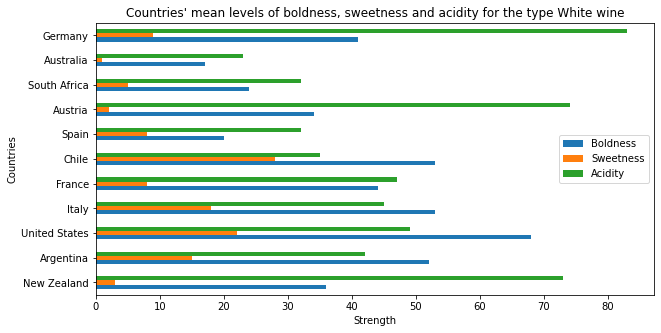

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_notes(df):
    
    df.dropna()
    counts = df['Country'].value_counts()
    df = df[df.isin(counts.index[counts >= 5]).values]

    countries = df.Country.unique()
    plotdata = pd.DataFrame(0, index=df.Country.unique(), columns=['Boldness', 'Sweetness', 'Acidity'])
    loop = 0
    
    for c in countries:
        mask = df['Country'] == c
        plotdata['Boldness'][loop] = df[mask]['Boldness'].mean()
        plotdata['Sweetness'][loop] = df[mask]['Sweetness'].mean()
        plotdata['Acidity'][loop] = df[mask]['Acidity'].mean()
        loop += 1

    mask = plotdata['Boldness'] > 0
    plotdata = plotdata[mask]
    plotdata.plot(kind="barh", figsize=(10,5))
    plt.title("Countries' mean levels of boldness, sweetness and acidity for the type " + str(df.Winetype.unique()[0]))
    plt.ylabel("Countries")
    plt.xlabel("Strength")

df = pd.read_csv('WhiteWineWithNotes.csv')
plot_notes(df)

In [4]:
#df.groupby('Country')['Acidity'].describe()

In [5]:
#df = pd.read_csv('RedWineWithNotes.csv')
#plot_notes(df)

(4, 3)
               Boldness  Sweetness    Acidity
Winetype                                     
Dessert wine  78.754172  79.389666  72.857228
Red wine      64.161981  15.218777  46.843307
Rosé wine     36.668260   3.140608  60.293640
White wine    51.094993  14.231527  53.890798


Text(0.5, 1.0, 'Mean levels of boldness, sweetness and acidity by type')

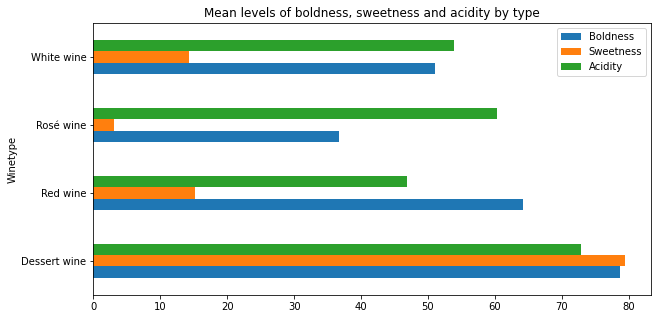

In [4]:
list_of_dfs = []

for i in appended_df.columns[6:9]:
    list_of_dfs.append(appended_df.groupby('Winetype')[i].mean())

temp = list_of_dfs[0].to_frame().merge(list_of_dfs[1].to_frame(), on='Winetype')
notes_by_winetype = temp.merge(list_of_dfs[2].to_frame(), on='Winetype')

print(notes_by_winetype.shape)
print(notes_by_winetype)
ax = notes_by_winetype.plot(kind="barh", figsize=(10,5))
plt.title("Mean levels of boldness, sweetness and acidity by type")

#for p in ax.patches:
#    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height()) * 1.005), rotation=90)